<a href="https://colab.research.google.com/github/vishesh342/Major_project/blob/master/Project_Major_ML_July_August.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv')

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#**Droping unnecesarry columns**


In [ ]:
data.drop(['Id','ProductId','UserId','ProfileName','Time','Text','HelpfulnessNumerator','HelpfulnessDenominator'],axis=1,inplace=True)

In [ ]:
data.head()

,Score,Summary
0,5,Good Quality Dog Food
1,1,Not as Advertised
2,4,"""Delight"" says it all"
3,2,Cough Medicine
4,5,Great taffy


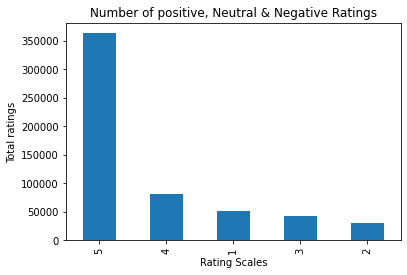

In [ ]:
data.Score.value_counts().plot(kind = "bar")
plt.title('Number of positive, Neutral & Negative Ratings')
plt.xlabel('Rating Scales')
plt.ylabel('Total ratings')
plt.show()

#Applying the sentiment based on scores
Based on the score provide by the customer , we provide the labels as Positive, Negative & Neutral . If Score > 3 we classify it as Positive , if Score < 3 we classify it as Negative . if Score = 3 then it is Neutral.
 


In [ ]:
data.dropna(axis=0,inplace=True)
data['Sentiment']=data['Score'].apply(lambda Score: 'Positive' if Score>3 else('Negative' if Score<3 else 'Neutral'))
index=data[data['Sentiment']=='Neutral'].index
data.drop(index=index,axis=0,inplace=True)
data.Sentiment.value_counts()

Positive    443777
Negative     82012
Name: Sentiment, dtype: int64

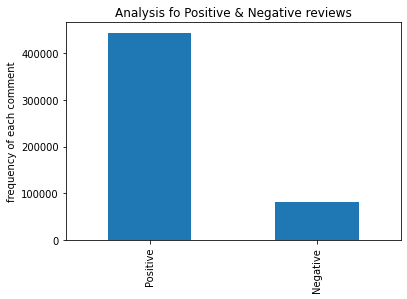

In [ ]:
#Bar graph to present strength of positive & Negative Review
data['Sentiment'].value_counts().plot(kind ="bar")
plt.title("Analysis fo Positive & Negative reviews")
plt.ylabel("frequency of each comment") 
plt.show()

#**Handle Imbalanced Data**

In [ ]:
data.head()

,Score,Summary,Sentiment
0,5,Good Quality Dog Food,Positive
1,1,Not as Advertised,Negative
2,4,"""Delight"" says it all",Positive
3,2,Cough Medicine,Negative
4,5,Great taffy,Positive


In [ ]:
X=data.iloc[:,1]
y=data['Sentiment']
X.shape

(525789,)

In [ ]:
y.shape

(525789,)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

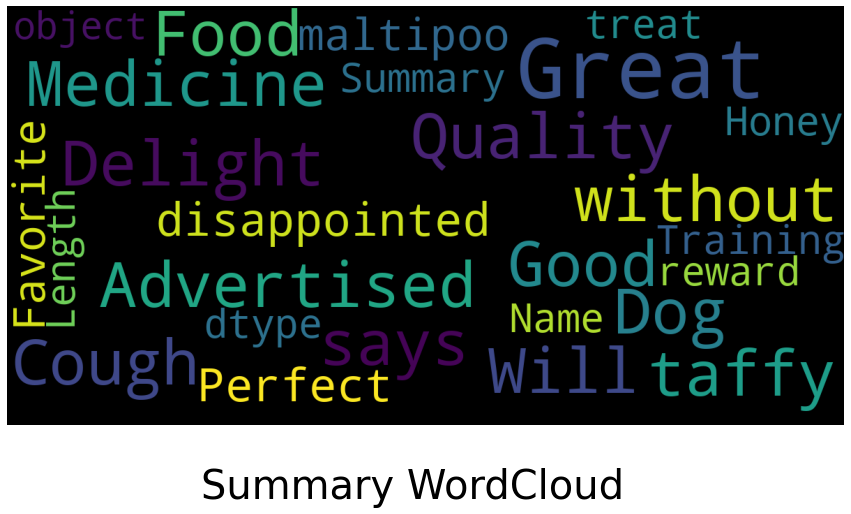

In [ ]:
stopwords = set(STOPWORDS)
def Mywordcloud(data, title = None):
  wordcloud = WordCloud(
      background_color = 'Black',
      stopwords = stopwords,
      max_words = 400,
      max_font_size = 40,
      scale = 3,
      random_state = 1
  ).generate(str(data))

  fig = plt.figure(1, figsize = (15,15))
  plt.axis('off')
  if title:
    fig.suptitle(title, fontsize=40)
    fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()


Mywordcloud(data['Summary'],'Summary WordCloud')

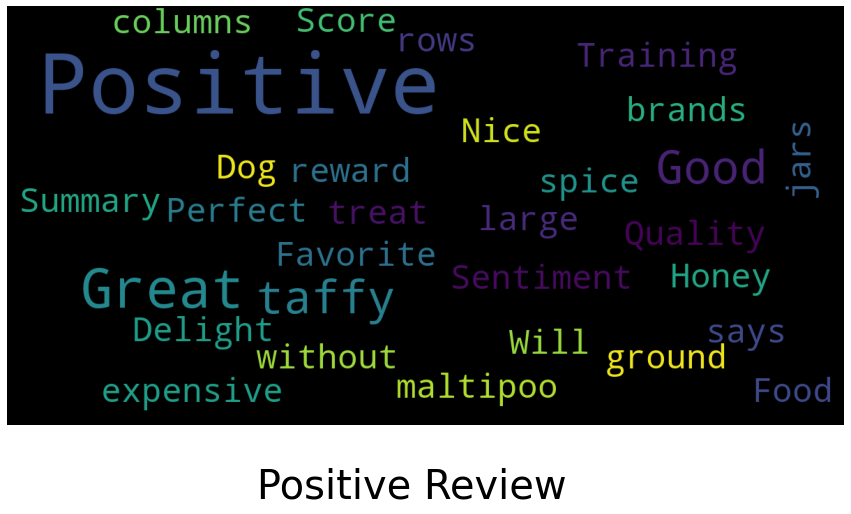

In [ ]:
Mywordcloud(data[data['Sentiment']=='Positive'],'Positive Review')

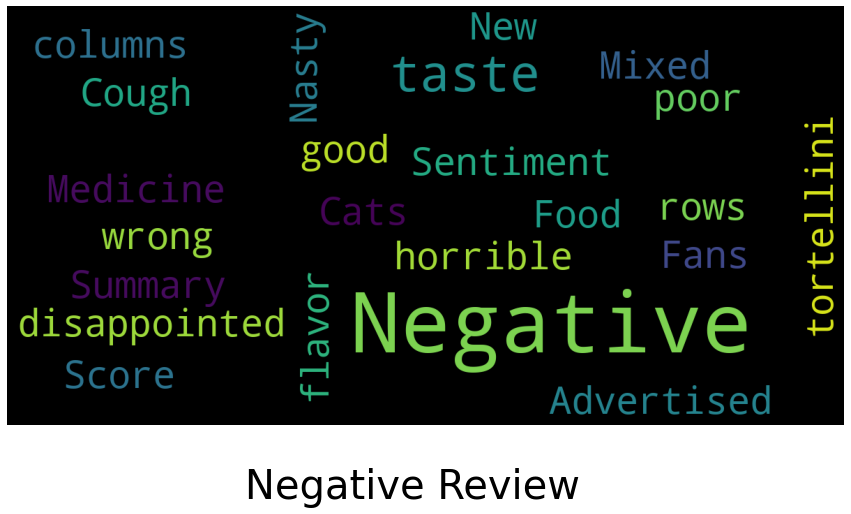

In [ ]:
Mywordcloud(data[data['Sentiment']=='Negative'],'Negative Review')

#Preparing The Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)


In [ ]:
cv = CountVectorizer()
xtrain_tr = cv.fit_transform(xtrain)
xtest_tr= cv.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(xtrain_tr,ytrain)

NameError: ignored

In [ ]:
ypred=clf.predict(xtest_tr)
ypred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
score=accuracy_score(ypred,ytest)
score

0.9251792540748207

In [ ]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

    Negative       0.66      0.83      0.73     19653
    Positive       0.97      0.94      0.96    138084

    accuracy                           0.93    157737
   macro avg       0.82      0.88      0.84    157737
weighted avg       0.94      0.93      0.93    157737



In [ ]:
df= {'review':input('enter your reviev :')}
df=pd.DataFrame(df,index=[0])
to_pred=df.iloc[:,0]
result=clf.predict(cv.transform(to_pred))
print(str(result[0]))



enter your reviev :bad bad very bad
Negative


In [ ]:
confusion_matrix(ypred,ytest)

array([[ 16234,   3419],
       [  8383, 129701]])

In [ ]:
!pip install streamlit


In [ ]:
!pip install pyngrok


  Created wheel for pyngrok: filename=pyngrok-4.1.10-cp36-none-any.whl size=16378 sha256=122d4006a7cb5b71ec1dbab2c59bdff4249c06061e4eef7376a9876ad4fcd3f9
  Stored in directory: /root/.cache/pip/wheels/0d/7f/06/e8079dd6f80eb6683fac47c4e1cb720b61cd82d6e4c13d87a5
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
ngrok.connect(port='8501')

'http://76466a84252a.ngrok.io'

In [ ]:
%%writefile ML_APP.py
import streamlit as st
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv')
data.drop(['Id','ProductId','UserId','ProfileName','Time','Text','HelpfulnessNumerator','HelpfulnessDenominator'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)
data['Sentiment']=data['Score'].apply(lambda Score: 'Positive' if Score>3 else('Negative' if Score<3 else "Neutral"))
index=data[data['Sentiment']==0].index
data.drop(index=index,axis=0,inplace=True)
X=data.iloc[:,1]
y=data['Sentiment']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)
cv = CountVectorizer()
xtrain_tr = cv.fit_transform(xtrain)
xtest_tr= cv.transform(xtest)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(xtrain_tr,ytrain)





st.title("SENTIMENT ANALYSIS")
image=Image.open('/content/drive/My Drive/Colab Notebooks/Analysis_img.png')
st.image(image,width=800)
review=st.text_input('Enter your short review :')
df= {'review':review}
df=pd.DataFrame(df,index=[0])
to_pred=df.iloc[:,0]
result=clf.predict(cv.transform(to_pred))
if(st.button('Predict')):
    st.write(result[0]) 


Overwriting ML_APP.py


In [ ]:
!streamlit run ML_APP.py